<a href="https://colab.research.google.com/github/AnmolJindal2019/BeZen-Data-Science-Assignment/blob/main/Bezen_DataScience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

In [ ]:
!pip install --upgrade --no-cache-dir gdown

In [ ]:
!gdown --id 1tBP7xKLcXhtmeUGed5SMfyuBfLtuRnjb

In [2]:
# reading the CSV file using the pandas read_csv method

original_data = pd.read_csv("/content/2022_02_08-02_30_31_AM.csv")

In [30]:
# displaying some information about the pandas dataframe

original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13730000 entries, 0 to 13729999
Data columns (total 6 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   uuid              object
 1   price_string      object
 2   price_string_unf  object
 3   product_type      object
 4   level_1           object
 5   category          object
dtypes: object(6)
memory usage: 628.5+ MB


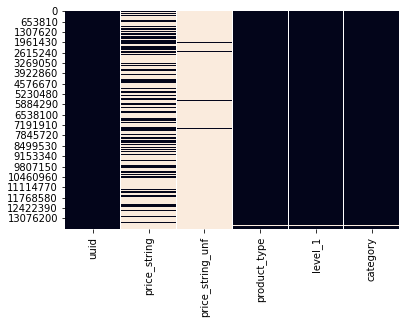

In [29]:
""" plotting a seaborn matrix where the white space depicts
    a missing valua or NaN value """

hm = sns.heatmap(original_data.isnull() , cbar = False)

plt.show()

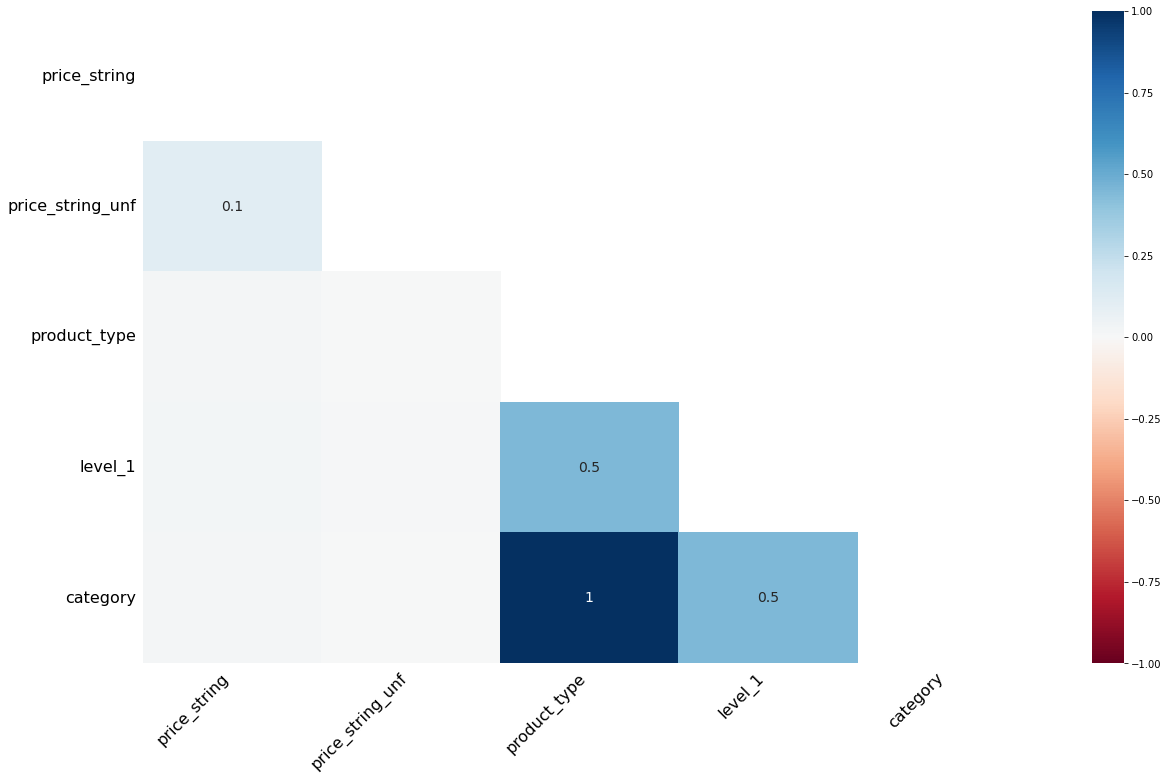

In [31]:
""" plotting a missingno heatmap to understand
    the correlation of missingness between any 2 columns """

msno.heatmap(original_data)

## 1) Products without prices

In [32]:
products_without_price = original_data[original_data['price_string'].isna()]
count_products_without_price = len(products_without_price)

In [33]:
print("COUNT OF PRODUCTS WITHOUT PRICES:",count_products_without_price)

COUNT OF PRODUCTS WITHOUT PRICES: 8220000


In [34]:
products_without_price

,uuid,price_string,price_string_unf,product_type,level_1,category
0,638744a4-b0ae-4166-8cb6-5c063c862036,NaN,NaN,TGFwdG9wIENvdmVycy9CYWdz,TGFwdG9wIENhc2U,RWxlY3Ryb25pY3M
1,ab313969-02cc-48b2-9daf-0054efb70b92,NaN,NaN,QmFraW5nIEN1cHMgYW5kIE1hdHM,QmFraW5nIE1hdHMgLyBCYWtpbmcgZGlzaA,a2l0Y2hpbmcgYW5kIGRpbmluZw
5,389d9f75-cc3f-4bd2-94f7-93e381a3bed5,NaN,NaN,TmF0dXJhbCBTd2VldGVuZXJzLyBTdWdhcg,TW9uayBGcnVpdA,Z3JvY2VyaWVz
13,1f2766ec-0a27-43f8-b28b-77a44492ead1,NaN,NaN,U2NydWJzIGFuZCBjbGVhbmluZyBjbG90aHM,U2NydWJz,SG91c2Vob2xkIGFuZCBDbGVhbmluZw
16,7bad39f5-74b9-4611-afb9-46fb135190cd,NaN,NaN,UGx1cyBzaXplIHdlYXIgZHJlc3M,RHJlc3M,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz
...,...,...,...,...,...,...
13729992,8d763911-79b7-402d-8964-6bfe89692c66,NaN,NaN,TWVucyB3b3Jrd2Vhci8gb2ZmaWNlIHdlYXI,U2hpcnRz,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz
13729993,2dc182aa-d591-49e4-85d1-5c4a60a09664,NaN,NaN,U3BpY2Vz,UGVwcGVy,Z3JvY2VyaWVz
13729995,2a13338e-9268-4f7b-9e7c-b8c41c72971b,NaN,NaN,RHJlc3Nlcw,TWF4aSBkcmVzcw,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz
13729997,679f073a-862a-4e43-b5ce-41e45afd3bfa,NaN,NaN,UGV0IEZvb2Q,RHJ5IERvZyBGb29k,cGV0IHN1cHBsaWVz


## 2) Count of products without prices and with prices in each Product Type, Category, Level 1

In [14]:
data2 = original_data.copy()
data2 = data2.fillna(-1)

In [15]:
def get_count_price_no_price(df , column_name):
    each_type = df.groupby(column_name)['price_string'].value_counts() #grouping the dataset on the basis of the provided column
    each_type = each_type.unstack() # since value_counts return a multi_index dataframe, we have to unstack it
    count_non_null_prices = each_type.iloc[:,1:].sum(axis=1) # calculating total non-null values
    each_type['count_non_null_prices'] = count_non_null_prices
    each_type = each_type.rename({-1: 'count_null_prices'}, axis= 1)
    each_type = each_type[['count_non_null_prices' ,'count_null_prices']]
    each_type = each_type.fillna(0)
    each_type = each_type.reset_index().convert_dtypes()
    each_type = each_type.rename_axis(None, axis=1)
    each_type.loc[each_type[column_name] == -1 , column_name] = 'NULL'
    return each_type

### i) Each Product Type

In [16]:
# count of null and non-null prices for each product type

each_product_type = get_count_price_no_price(data2 , 'product_type')

In [17]:
each_product_type

,product_type,count_non_null_prices,count_null_prices
0,NULL,0,10000
1,Q0FUIExJVFRFUg,0,30000
2,Q29mZmVlIEJlYW5z,30000,50000
3,Q29mZmVlIEZpbHRlcnM,0,10000
4,Q29uZGl0aW9uZXIgSGFpcg,10000,20000
...,...,...,...
317,cGV0IEJsYW5rZXQ,10000,10000
318,cGV0IFN0YWluIGFuZCBvZG9yIGVsaW1pbmF0b3I,0,10000
319,d29tZW5zIE91dGVyd2Vhcg,130000,20000
320,d29tZW5zIFdhbGxldA,20000,10000


## ii) Each Category

In [18]:
# count of null and non-null prices for each category

each_category_type = get_count_price_no_price(data2 , 'category')

In [40]:
each_category_type

,category,count_non_null_prices,count_null_prices
0,NULL,0,10000
1,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz,1860000,2050000
2,QXJ0IHN1cHBsaWVz,190000,130000
3,QmFieWNhcmU,90000,570000
4,RWxlY3Ryb25pY3M,110000,210000
5,SG91c2Vob2xkIGFuZCBDbGVhbmluZw,700000,870000
6,SGVhbHRo,290000,700000
7,VG95cyBhbmQgR2FtZXM,190000,600000
8,VG9vbHMgYW5kIGhvbWUgaW1wcm92ZW1lbnQ,200000,320000
9,YmVhdXR5IGFuZCBwZXJzb25hbCBjYXJl,750000,720000


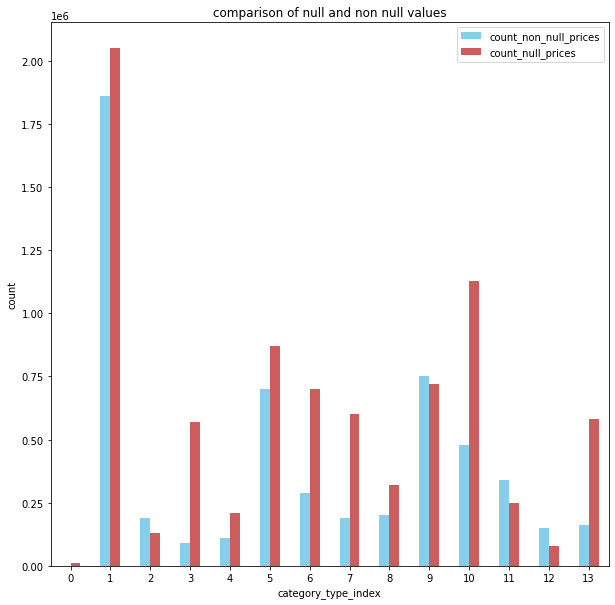

In [37]:
df = each_category_type[['count_non_null_prices' , 'count_null_prices']]
ax = df.plot.bar(color=["SkyBlue","IndianRed"],rot = 0 , title="comparison of null and non null values" ,figsize=(10, 10))
ax.set_xlabel("category_type_index")
ax.set_ylabel("count")
plt.show()

## iii) Each Level 1

In [41]:
# count of null and non-null prices for each level_1 type

each_level1_type = get_count_price_no_price(data2 , 'level_1')

In [42]:
each_level1_type

,level_1,count_non_null_prices,count_null_prices
0,NULL,10000,40000
1,MTAgQ3Vw,10000,0
2,MjAgQ3Vw,10000,0
3,MjAgUGludHM,10000,20000
4,MzAgQ3Vw,10000,0
...,...,...,...
591,d29tZW5zIGJvb3Rz,20000,20000
592,d29tZW5zIGhlZWxz,10000,0
593,eW9nYSBCbG9ja3M,20000,10000
594,eW9nYSBib2xzdGVycw,10000,10000


In [44]:
#printing the total null values obtained in each dataframes above in order to verify result

print("COUNT OF PRODUCTS WITHOUT PRICES:",count_products_without_price)
print("COUNT OF NULL VALUES IN PRODUCT TYPE:",each_product_type['count_null_prices'].sum())
print("COUNT OF NULL VALUES IN CATEGORY TYPE:",each_product_type['count_null_prices'].sum())
print("COUNT OF NULL VALUES IN LEVEL_1 TYPE:",each_level1_type['count_null_prices'].sum())

COUNT OF PRODUCTS WITHOUT PRICES: 8220000
COUNT OF NULL VALUES IN PRODUCT TYPE: 8220000
COUNT OF NULL VALUES IN CATEGORY TYPE: 8220000
COUNT OF NULL VALUES IN LEVEL_1 TYPE: 8220000


## 3) Correct Product Prices in the correct format (eg: $ 56) wherever possible and separate them into currency and value columns.

In [3]:
data3 = original_data.copy()

In [4]:
def correct_price(x):
    if (pd.isna(x) == False): # skipping the NULL values
        x = str(x)
        x = x.strip('$')
        x = str.format("$ {}" , x)
    return(x)

In [5]:
#applying the aboce funntion the price_string column in order to correct the price format

data3['price_string'] = data3['price_string'].apply(correct_price)

In [6]:
#splitting the price_string into currency and value columns using pandas string functions

data3[['Currency' , 'Value']] = data3['price_string'].str.split(" " , n = 1 , expand = True)

In [9]:
# displaying the modified data

data3[['price_string' , 'Currency' , 'Value']]

,price_string,Currency,Value
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,$ 19.95,$,19.95
3,$ 92.00,$,92.00
4,$ 11.50,$,11.50
...,...,...,...
13729995,NaN,NaN,NaN
13729996,$ 69.99,$,69.99
13729997,NaN,NaN,NaN
13729998,NaN,NaN,NaN


## 4) List out the categories with average price of product.

In [7]:
data4 = data3.copy()

In [8]:
# converting value column to numeric

data4['Value'] = pd.to_numeric(data4['Value'])

In [10]:
# grouping the data on basis of category and then calculating mean of prices for each category

each_category_mean = data4.groupby('category' , dropna = False)['Value'].mean()

In [11]:
each_category_mean

category
Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz       125.413871
QXJ0IHN1cHBsaWVz                        19.471053
QmFieWNhcmU                            163.688889
RWxlY3Ryb25pY3M                         60.258182
SG91c2Vob2xkIGFuZCBDbGVhbmluZw          76.199000
SGVhbHRo                                32.557586
VG95cyBhbmQgR2FtZXM                     32.448947
VG9vbHMgYW5kIGhvbWUgaW1wcm92ZW1lbnQ     82.223500
YmVhdXR5IGFuZCBwZXJzb25hbCBjYXJl        34.745067
Z3JvY2VyaWVz                            10.541667
a2l0Y2hpbmcgYW5kIGRpbmluZw              16.703235
b2ZmaWNlIHByb2R1Y3Rz                    20.480000
cGV0IHN1cHBsaWVz                        14.181875
NaN                                           NaN
Name: Value, dtype: float64

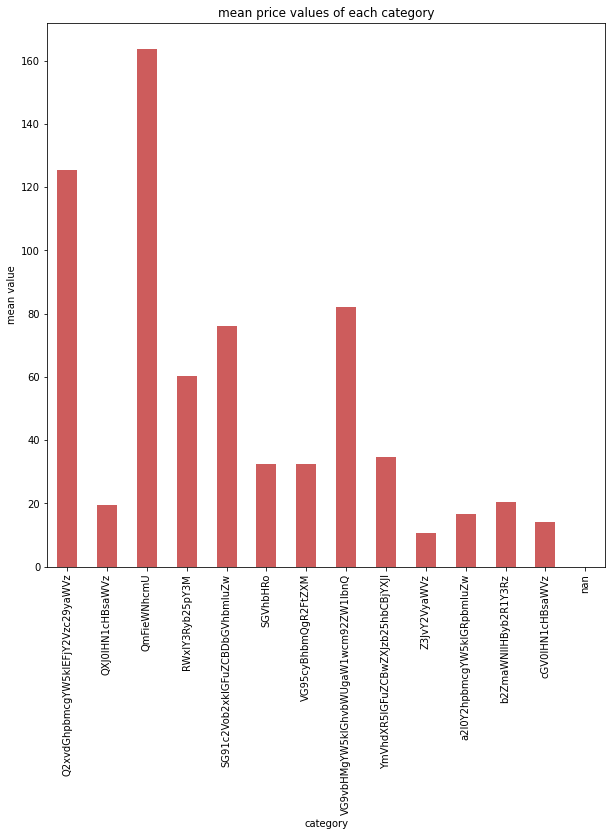

In [44]:
ax = each_category_mean.plot.bar(color=["IndianRed"] , title="mean price values of each category" ,figsize=(10, 10))
ax.set_xlabel("category")
ax.set_ylabel("mean value")
plt.show()